In [55]:
! ./target/release/ex5-14 10000

METHOD1: finished after 18.99ms
METHOD2: finished after 19.51ms
METHOD3: finished after 18.50ms
METHOD4: finished after 18.24ms
METHOD5: finished after 23.42ms


In [56]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

In [57]:

def near( p, pntList, d0 ):
    displ = pntList - p
    dist2 = np.linalg.norm(displ, axis=1)
    nearp = dist2[dist2 < d0**2]
    return sum(1- np.sqrt(nearp / d0**2))

def make_heatmap(pointList, dist):
    u = np.linspace(0, 2 * np.pi, 120)
    v = np.linspace(0, np.pi, 60)

    # create the sphere surface
    XX = 10 * np.outer(np.cos(u), np.sin(v))
    YY = 10 * np.outer(np.sin(u), np.sin(v))
    ZZ = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

    WW = XX.copy()
    for i in range( len( XX ) ):
        for j in range( len( XX[0] ) ):
            x = XX[ i, j ]
            y = YY[ i, j ]
            z = ZZ[ i, j ]
            WW[ i, j ] = near(np.array([x, y, z ]), pointList, dist)
    print(WW)
    WW = WW / np.amax( WW )
    return (XX, YY, ZZ, WW)


In [58]:
angle1 = np.loadtxt("data/angle-method1.dat")
angle2 = np.loadtxt("data/angle-method2.dat")
angle3 = np.loadtxt("data/angle-method3.dat")
angle4 = np.loadtxt("data/angle-method4.dat")
angle5 = np.loadtxt("data/angle-method5.dat")

vec1 = np.loadtxt("data/3d-method1.dat")
vec2 = np.loadtxt("data/3d-method2.dat")
vec3 = np.loadtxt("data/3d-method3.dat")
vec4 = np.loadtxt("data/3d-method4.dat")
vec5 = np.loadtxt("data/3d-method5.dat")

radius = 3.01

# Method 1
choose 3 random nrs and normalize.  
This does not work well, since it generates uniform vectors in a cube and then normalizes, hence vectors with more possible $r$, i.e. the corners have more points, that get scaled down to the same point on the sphere

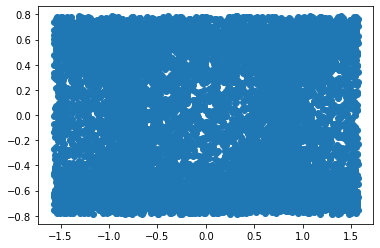

In [59]:
plt.scatter(angle1[:, 0], angle1[:, 1])

[[0.24461948 0.2468708  0.24683263 ... 0.25360157 0.24721212 0.247722  ]
 [0.24461948 0.24684705 0.24648734 ... 0.25380197 0.24750501 0.247722  ]
 [0.24461948 0.24681182 0.24642762 ... 0.25387235 0.24778773 0.247722  ]
 ...
 [0.24461948 0.24673396 0.24764723 ... 0.25296037 0.24650506 0.247722  ]
 [0.24461948 0.24683559 0.24732956 ... 0.25335612 0.24686938 0.247722  ]
 [0.24461948 0.2468708  0.24683263 ... 0.25360157 0.24721212 0.247722  ]]


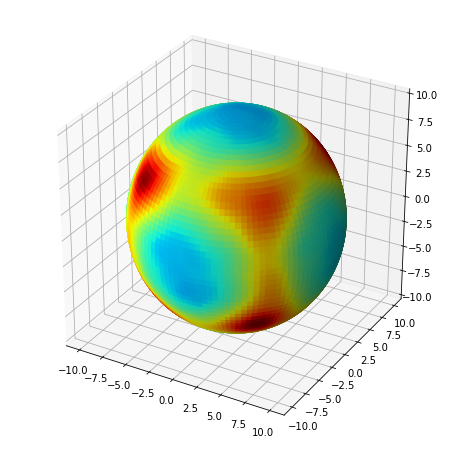

In [60]:
fig = plt.figure(figsize=plt.figaspect(1) * 2)
ax = plt.axes(projection='3d')
XX, YY, ZZ, heatmap = make_heatmap(vec1, radius)
ax.plot_surface( XX, YY,  ZZ, cstride=1, rstride=1, facecolors=cm.jet(heatmap ) )

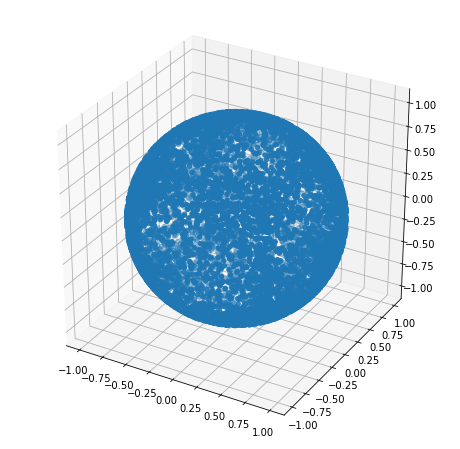

In [61]:
fig = plt.figure(figsize=plt.figaspect(1) * 2)
ax = plt.axes(projection='3d')
ax.scatter3D(vec1[:, 0], vec1[:, 1], vec1[:, 2])

# Method 2
Generate 3 random nrs, discard if abs > 1

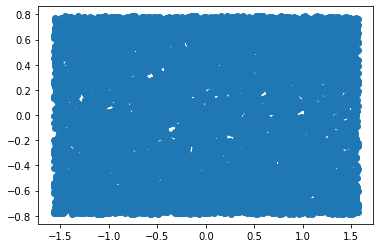

In [62]:
plt.scatter(angle2[:, 0], angle2[:, 1])

[[0.43305839 0.44879955 0.45566337 ... 0.41854699 0.4337055  0.45243497]
 [0.43305839 0.44877719 0.45579925 ... 0.41868949 0.43379549 0.45243497]
 [0.43305839 0.44877606 0.45625443 ... 0.41910705 0.43387587 0.45243497]
 ...
 [0.43305839 0.44871822 0.45640666 ... 0.4182314  0.43408758 0.45243497]
 [0.43305839 0.4487732  0.45589198 ... 0.41840717 0.43383174 0.45243497]
 [0.43305839 0.44879955 0.45566337 ... 0.41854699 0.4337055  0.45243497]]


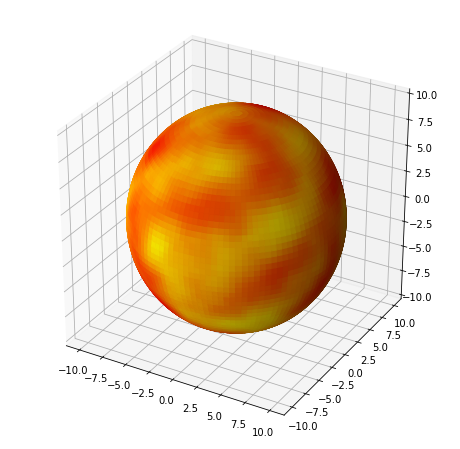

In [63]:
fig = plt.figure(figsize=plt.figaspect(1) * 2)
ax = plt.axes(projection='3d')
#ax.scatter3D(vec2[:, 0], vec2[:, 1], vec2[:, 2])
XX, YY, ZZ, heatmap = make_heatmap(vec2, radius)
ax.plot_surface( XX, YY,  ZZ, cstride=1, rstride=1, facecolors=cm.jet(heatmap ) )

# Method 3
Choose $\theta$ and $\varphi$.  
By choosing the angles, the points are unifomrly distributed at the lattitude, and they get denser the nearer you get to the poles. Also if $\theta$ = $\{0, \pi\}$ then all $\phi$ are maped to the same value.

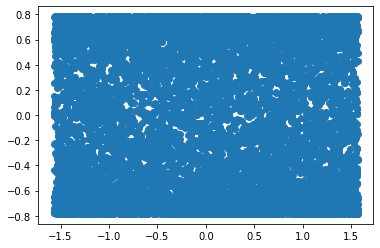

In [64]:
plt.scatter(angle3[:, 0], angle3[:, 1])

[[2.33944117 2.31938642 2.1982497  ... 2.11619695 2.24591363 2.29784044]
 [2.33944117 2.3183988  2.19640241 ... 2.11781837 2.24637255 2.29784044]
 [2.33944117 2.31726384 2.19483429 ... 2.11936589 2.2467445  2.29784044]
 ...
 [2.33944117 2.32117445 2.20225903 ... 2.11244272 2.24528264 2.29784044]
 [2.33944117 2.32027034 2.20014256 ... 2.11420699 2.24561348 2.29784044]
 [2.33944117 2.31938642 2.1982497  ... 2.11619695 2.24591363 2.29784044]]


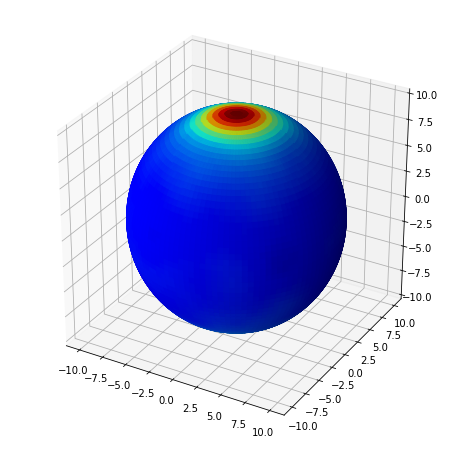

In [65]:
fig = plt.figure(figsize=plt.figaspect(1) * 2)
ax = plt.axes(projection='3d')
#ax.scatter3D(vec2[:, 0], vec2[:, 1], vec2[:, 2])
XX, YY, ZZ, heatmap = make_heatmap(vec3, radius)
ax.plot_surface( XX, YY,  ZZ, cstride=1, rstride=1, facecolors=cm.jet(heatmap ) )

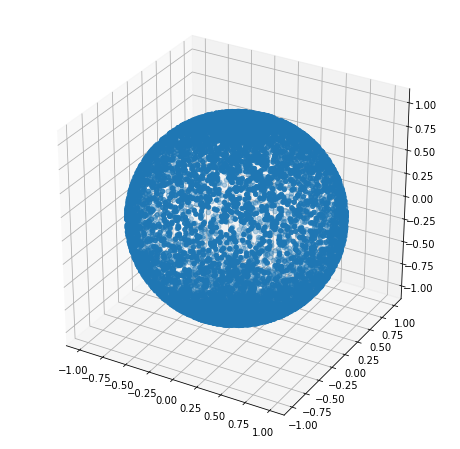

In [66]:
fig = plt.figure(figsize=plt.figaspect(1) * 2)
ax = plt.axes(projection='3d')
ax.scatter3D(vec3[:, 0], vec3[:, 1], vec3[:, 2])


# Method 4
Choose $\varphi$ and $\cos \theta$

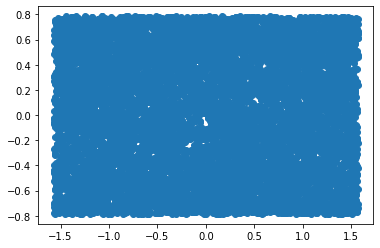

In [67]:
plt.scatter(angle4[:, 0], angle4[:, 1])

[[0.39304992 0.4102572  0.42805724 ... 0.46846191 0.46674102 0.46299463]
 [0.39304992 0.41091613 0.42852636 ... 0.46887617 0.46686199 0.46299463]
 [0.39304992 0.41159731 0.42879859 ... 0.46928366 0.46703237 0.46299463]
 ...
 [0.39304992 0.40903122 0.42623674 ... 0.46699176 0.46659047 0.46299463]
 [0.39304992 0.4096306  0.42720263 ... 0.46775458 0.46668133 0.46299463]
 [0.39304992 0.4102572  0.42805724 ... 0.46846191 0.46674102 0.46299463]]


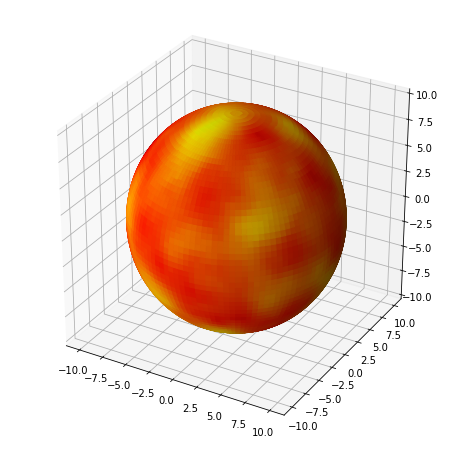

In [68]:
fig = plt.figure(figsize=plt.figaspect(1) * 2)
ax = plt.axes(projection='3d')
#ax.scatter3D(vec2[:, 0], vec2[:, 1], vec2[:, 2])
XX, YY, ZZ, heatmap = make_heatmap(vec4, radius)
ax.plot_surface( XX, YY,  ZZ, cstride=1, rstride=1, facecolors=cm.jet(heatmap ) )

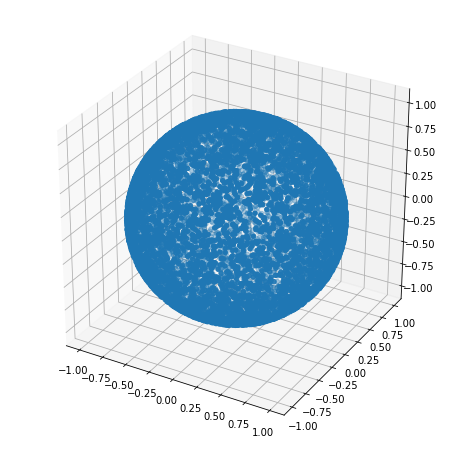

In [69]:
fig = plt.figure(figsize=plt.figaspect(1) * 2)
ax = plt.axes(projection='3d')
ax.scatter3D(vec4[:, 0], vec4[:, 1], vec4[:, 2])

# Method 5
Generate 4 values and normalize

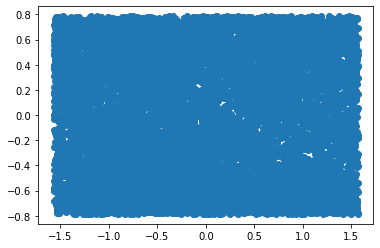

In [70]:
plt.scatter(angle5[:, 0], angle5[:, 1])

[[0.41886213 0.43136429 0.441067   ... 0.49062855 0.49271653 0.49897388]
 [0.41886213 0.4317147  0.44179955 ... 0.49053257 0.49253994 0.49897388]
 [0.41886213 0.43212583 0.44253198 ... 0.49042247 0.49233769 0.49897388]
 ...
 [0.41886213 0.43050738 0.43980215 ... 0.49117145 0.49341491 0.49897388]
 [0.41886213 0.43096503 0.44048004 ... 0.4908517  0.49302347 0.49897388]
 [0.41886213 0.43136429 0.441067   ... 0.49062855 0.49271653 0.49897388]]


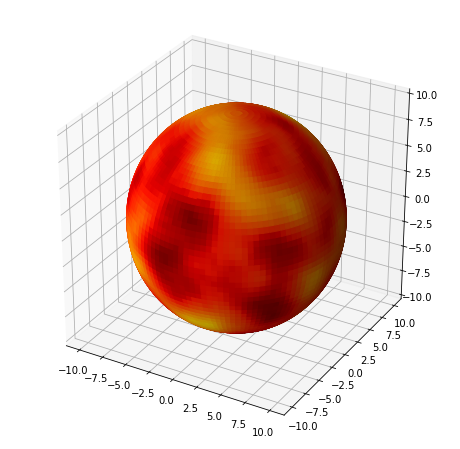

In [71]:
fig = plt.figure(figsize=plt.figaspect(1) * 2)
ax = plt.axes(projection='3d')
#ax.scatter3D(vec2[:, 0], vec2[:, 1], vec2[:, 2])
XX, YY, ZZ, heatmap = make_heatmap(vec5, radius)
ax.plot_surface( XX, YY,  ZZ, cstride=1, rstride=1, facecolors=cm.jet(heatmap ) )

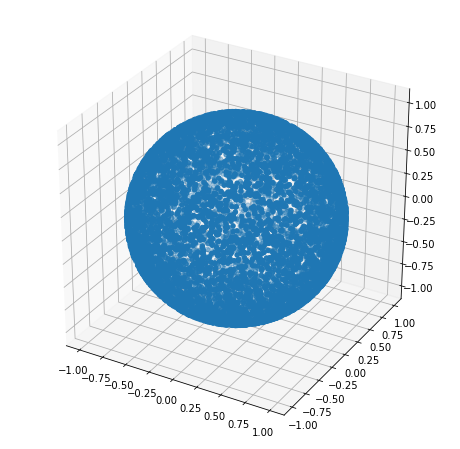

In [72]:
fig = plt.figure(figsize=plt.figaspect(1) * 2)
ax = plt.axes(projection='3d')
ax.scatter3D(vec5[:, 0], vec5[:, 1], vec5[:, 2])